In [51]:
### CS 3840 Applied Machine Learning - Lab Assignment 1

# <center>End-to-End Machine Learning Pipeline: A Linear Regression Problem</center>

### 1. Overview
The learning objective of this lab assignment is for students to understand the end-to-end machine learning pipeline, including how to load the data from csv file to DataFrame, how to take a quick look at data structure and statistics, how to visualize the data to gain insights, how to deal with missing features and categorical features, and how to scale feature values. As we use diabetes data as an example, this lab assignment also includes how to build a linear regression model to predict the diabetes progression in one year, and how to evaluate the regression results.

#### Lecture notes and code demonstrations. 
Detailed coverage of these topics can be found in the following:
<li>Lecture 2022-01-19-W-Terms and Principles of Machine Learning</li>
<li>Lecture 2022-01-24-M-Model Training using Gradient Descent</li>
<li>Code demonstration: Model Triaining using Gradient Descent.ipynb</li>
<li>Lecture 2022-01-26-W-Feature Representation and Evaluation Metrics</li>
<li>Code demonstration: Feature Representation and Evaluation Metrics.ipynb</li>

### 2. Submission
You need to submit a detailed lab report with code, running results, and answers to the questions. If you submit <font color='red'>a jupyter notebook (“Firstname-Lastname-Lab1.ipynd”)</font>, please fill in this file directly and place the code, running results, and answers in order for each question. If you submit <font color='red'>a PDF report (“Firstname-Lastname-Lab1.pdf”) with code file (“Firstname-Lastname-Lab1.py”)</font>, please include the screenshots (code and running results) with answers for each question in the report.  

### 3. Questions (50 points)

For this lab assignment, you will be using the `Diabetes dataset` to complete the following tasks and answer the questions. Diabetes dataset has different features and a target label. You will use these features to build a linear regression model to predict the diabetes disease progression one year. First, please place `diabetes.csv` and your notebook/python file in the same directory, and load the data into DataFrame.   

In [52]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#Please place diabetes.csv and your notebook/python file in the same directory; otherwise, change DATA_PATH 
DATA_PATH = ""

def load_diabetes_data(diabetes_path=DATA_PATH):
    csv_path = os.path.join(diabetes_path, "diabetes.csv")
    return pd.read_csv(csv_path)

diabetes = load_diabetes_data()

#### Question 1 (5 points):  
Please print out the information/statistics of diabetes DataFrame in function `answer_one( )`, and describe: how many records does the diabetes dataset have? Except for the target label `diabetes_progression_one_year`, how many features does the diabetes dataset have? What are these features? Among these features, which feature is non-numerical (categorical) and which feature has missing values? 

In [53]:
def answer_one():
    #Please complete print() using data frame's info()
    print(diabetes.info())
    print("\nThere are 10 total features in this dataset excluding `diabetes_progression_one_year`. These features include age, gender, bmi, blood pressure, total serum cholesterol, low and high density lipoproteins, total cholesterol, serum triglycerides level, and blood sugar level")
    print("Amoung these features only one of them, gender, is categorical. Total cholesterol is the only feature with missing values.")
#Run your function in the cell to return the result
answer_one()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            442 non-null    int64  
 1   gender                         442 non-null    object 
 2   bmi                            442 non-null    float64
 3   blood_pressure                 442 non-null    float64
 4   total_serum_cholesterol        442 non-null    int64  
 5   low_density_lipoproteins       442 non-null    float64
 6   high_density_lipoproteins      442 non-null    float64
 7   total_cholesterol              431 non-null    float64
 8   serum_triglycerides_level      442 non-null    float64
 9   blood_sugar_level              442 non-null    int64  
 10  diabetes_progression_one_year  442 non-null    int64  
dtypes: float64(6), int64(4), object(1)
memory usage: 38.1+ KB
None

There are 10 total features in this dataset ex

#### Question 2 (5 points):  
Please visualize the data by plotting a histogram for each numerical feature in function `answer_two( )`, and describe the observation on the data distribtuion for feature `total_cholesterol` and what all these feature scales look like. 

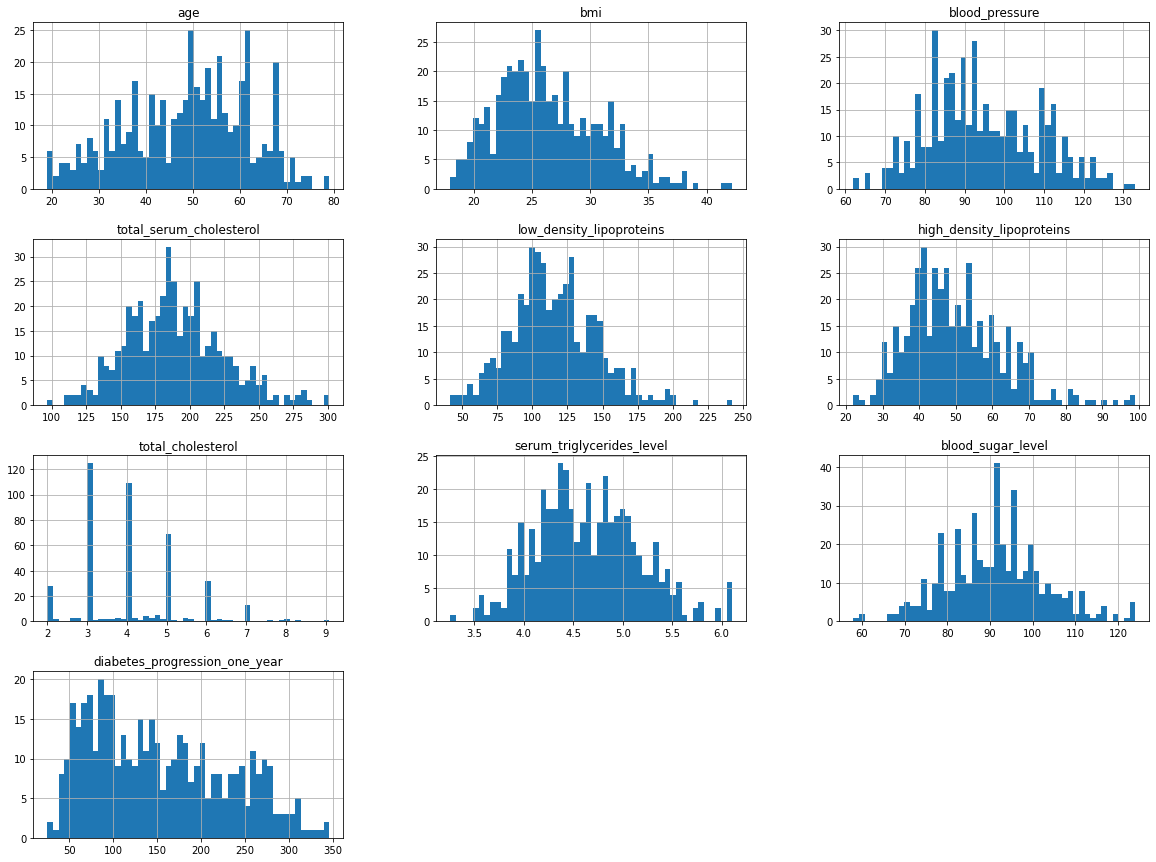

The distribution for total_cholesterol is mostly split up into large `bins` which seem to land on or near whole numbers. I imagine this comes from the way in which the data is collected or measured, though I would note there are still `bins` of much lower frequency in the decimals in-between these whole numbers.
The other features distributions with the exception of age, all seem to fall on a relatively normal bell curve. The age feature seems to have a few outlying ages with a higher density, namely around 50, 55, 61, and 68.


In [54]:
def answer_two():
    #Please complete the function using data frame's hist() with bins=50, figsize=(20,15)
    diabetes.hist(bins=50, figsize=(20,15))
    plt.show()
    print("The distribution for total_cholesterol is mostly split up into large `bins` which seem to land on or near whole numbers. I imagine this comes from the way in which the data is collected or measured, though I would note there are still `bins` of much lower frequency in the decimals in-between these whole numbers.")
    print("The other features distributions with the exception of age, all seem to fall on a relatively normal bell curve. The age feature seems to have a few outlying ages with a higher density, namely around 50, 55, 61, and 68.")
    
#Run your function in the cell to return the result
answer_two()

#### Question 3 (5 points):  
Please calculate feature correlation matrix and print out the feature correlation information for `diabetes_progression_one_year` in function `answer_three( )`, and describe: except for `diabetes_progression_one_year` itself, which feature has the strongest correlation with `diabetes_progression_one_year`, and which feature has the weakest correlation with `diabetes_progression_one_year`? Why?   

In [55]:
def answer_three():
    #Please complete the function using data frame's corr()
    corr_matrix = diabetes.corr()
    print(corr_matrix["diabetes_progression_one_year"].sort_values(ascending=False))
    print("\nThe feature with the strongest correlation to diabetes_progression_one_year is bmi I would suspect this is because bmi is a general indicator for peoples body mass and composition. \nThe feature with the weakest correlation is low_density_lipoproteins, I suspect this is because low desity fat protein levels would poorly indecate how someones diabetes is progressing.")

#Run your function in the cell to return the result
answer_three()

diabetes_progression_one_year    1.000000
bmi                              0.586450
serum_triglycerides_level        0.565883
blood_pressure                   0.441482
total_cholesterol                0.425980
blood_sugar_level                0.382483
total_serum_cholesterol          0.212022
age                              0.187889
low_density_lipoproteins         0.174054
high_density_lipoproteins       -0.394789
Name: diabetes_progression_one_year, dtype: float64

The feature with the strongest correlation to diabetes_progression_one_year is bmi I would suspect this is because bmi is a general indicator for peoples body mass and composition. 
The feature with the weakest correlation is low_density_lipoproteins, I suspect this is because low desity fat protein levels would poorly indecate how someones diabetes is progressing.


#### Question 4 (3 points):  
From question 3, you can figure out the feature (<font color='red'>strongest_feature</font>) that has the strongest correlation with `diabetes_progression_one_year`, and the feature (<font color='red'>weakest_feature</font>) that has the weakest correlation with `diabetes_progression_one_year`. Please fill in feature name in the option `x=" "` of plot function in `answer_four( )` to plot the data distribution between the strongest/weakest feature and `diabetes_progression_one_year`.  

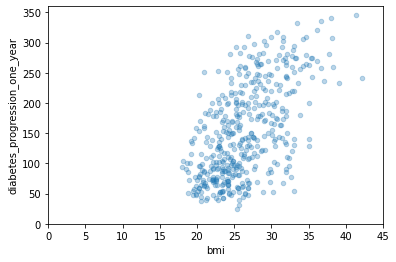

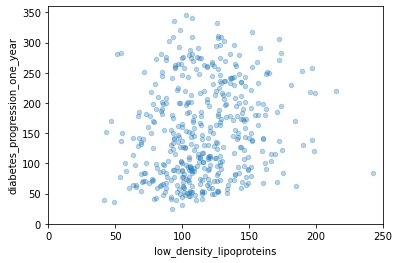

In [56]:
def answer_four():
    #Please set option x=" " using the name of strongest_feature 
    diabetes.plot(kind="scatter", x="bmi", y="diabetes_progression_one_year", alpha=0.3)
    plt.axis([0, 45, 0, 360])
    
    #Please set option x=" " using the name of weakest_feature
    diabetes.plot(kind="scatter", x="low_density_lipoproteins", y="diabetes_progression_one_year", alpha=0.3)
    plt.axis([0, 250, 0, 360])
    
    plt.show()

#Run your function in the cell to return the result
answer_four()

#### Devide the DataFrame into features `diabetes_features` and labels `diabetes_labels`

In [57]:
diabetes_labels = diabetes["diabetes_progression_one_year"].copy() # use diabete_progression_one_year as label
diabetes_features = diabetes.drop("diabetes_progression_one_year", axis=1) # drop diabete_progression_one_year

#### Question 5 (5 points):  
As `total_cholesterol` has missing values, please use its <font color=red>media</font> number to set those missing feature values in function `answer_five( )`. After processing, please describe if there are still data records with NULL feature values by using the given code line.   

In [58]:
def answer_five():
    #Please operate on diabetes_features to set the missing "total_cholesterol" values using media
    median = diabetes_features["total_cholesterol"].median()
    diabetes_features["total_cholesterol"].fillna(median, inplace=True)
    diabetes_features.info()
    print("\nThe data no longer has records with NULL feature values")

#Run your function in the cell to return the result
answer_five()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   age                        442 non-null    int64  
 1   gender                     442 non-null    object 
 2   bmi                        442 non-null    float64
 3   blood_pressure             442 non-null    float64
 4   total_serum_cholesterol    442 non-null    int64  
 5   low_density_lipoproteins   442 non-null    float64
 6   high_density_lipoproteins  442 non-null    float64
 7   total_cholesterol          442 non-null    float64
 8   serum_triglycerides_level  442 non-null    float64
 9   blood_sugar_level          442 non-null    int64  
dtypes: float64(6), int64(3), object(1)
memory usage: 34.7+ KB

The data no longer has records with NULL feature values


In [59]:
#Check if there are still records with null feature values
#Empty DataFrame means no record with null feature values
print(diabetes_features[diabetes_features.isnull().any(axis=1)].head())

Empty DataFrame
Columns: [age, gender, bmi, blood_pressure, total_serum_cholesterol, low_density_lipoproteins, high_density_lipoproteins, total_cholesterol, serum_triglycerides_level, blood_sugar_level]
Index: []


#### Devide features into numerical part `diabetes_num` and categorical part `diabetes_cat`

In [60]:
#diabetes_num only includes the numerical features without gender
diabetes_num = diabetes_features.drop("gender", axis=1)

#diabetes_cat only includes the categorical feature gender
diabetes_cat = diabetes_features[["gender"]]
print(diabetes_cat["gender"].value_counts())

male      235
female    207
Name: gender, dtype: int64


#### Question 6 (5 points):
As gender contains categories without order, please convert these categoties into numbers directly using `OrdinalEncoder` in function `answer_six( )`, and print out gender values after conversion.

In [61]:
from sklearn.preprocessing import OrdinalEncoder

def answer_six():
    ordinal_encoder = OrdinalEncoder()
    #Please complete the code line using ordinal_encoder.fit_transform to operate on diabetes_cat
    diabetes_cat_encoded = ordinal_encoder.fit_transform(diabetes_cat)
    
    return diabetes_cat_encoded

#Run your function in the cell to return the result
diabetes_cat_encoded = answer_six()
print(diabetes_cat_encoded)

[[0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [0.]
 [0.]
 [1.]
 [1.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [1.]
 [0.]
 [1.]
 [0.]
 [1.]
 [1.]
 [0.

#### Question 7 (5 points):
As numerical features have very different scales, please get all the features to have the same scale using `StandardScaler` in function `answer_seven( )`, and print out feature values after scaling.

In [62]:
from sklearn.preprocessing import StandardScaler

def answer_seven():
    std_scaler = StandardScaler()
    #Please complete the code line using std_scaler.fit_transform to operate on diabetes_num
    diabetes_num_scaled = std_scaler.fit_transform(diabetes_num)
    
    return diabetes_num_scaled

#Run your function in the cell to return the result
diabetes_num_scaled = answer_seven()
print(diabetes_num_scaled)

[[ 0.80050009  1.29708846  0.45984057 ... -0.05502621  0.41853093
  -0.37098854]
 [-0.03956713 -1.08218016 -0.55350458 ... -0.83833011 -1.43658851
  -1.93847913]
 [ 1.79330681  0.93453324 -0.1192138  ... -0.05502621  0.06015558
  -0.54515416]
 ...
 [ 0.87686984 -0.33441002  0.36357278 ... -0.23518611 -0.98564884
   0.32567395]
 [-0.9560041   0.82123474  0.02554979 ...  0.56378387  0.93616291
  -0.54515416]
 [-0.9560041  -1.53537419 -1.71161333 ... -0.83833011 -0.08875225
   0.06442552]]


#### Concatenate `diabetes_num_scaled` and `diabetes_cat_encoded` into the final features `X` 

In [63]:
#Diabetes features
X = np.concatenate((diabetes_num_scaled, diabetes_cat_encoded), axis=1)

#Diabetes labels
y = diabetes_labels.to_numpy()

print(X.shape)
print(y.shape)

(442, 10)
(442,)


#### Question 8 (5 points):
Please use `train_test_split` to split `X` and `y` into training and test sets `(X_train, X_test, y_train, and y_test)` in function `answer_eight()`, and describe what shape `X_train`, `X_test`, `y_train`, and `y_test` have, respectively? 

**Set `random_state=42` and `test_size=0.2` in `train_test_split` to make sure 80% of your dataset is used for training and 20% for testing**

In [64]:
from sklearn.model_selection import train_test_split

def answer_eight():
    #Please complete the code line using train_test_split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    
    return X_train, X_test, y_train, y_test

#Run your function in the cell to return the result
X_train, X_test, y_train, y_test = answer_eight()

#Print out the shapes of X_train, X_test, y_train, y_test 
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(353, 10)
(89, 10)
(353,)
(89,)


#### Question 9 (5 points):
Please use `LinearRegression` to build a linear regression model with `X_train` and `y_train` in function `answer_nine( )`.

In [65]:
from sklearn.linear_model import LinearRegression

def answer_nine():
    #Please create the model using LinearRegression
    lin_reg = LinearRegression()
    
    #Please train the model using fit() with X_train and y_train
    lin_reg.fit(X_train, y_train)
    
    return lin_reg

#Run your function in the cell to return the result
lin_reg = answer_nine()

#### Question 10 (5 points):
Please evaluate the linear regression model by calculating root mean square error (RMSE) and mean absolute error (MAE) between the true labels `y_test` and predictions `y_predict` in function `answer_ten( )`, and describe the results of RMSE and MAE.

In [66]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_predict = lin_reg.predict(X_test)

def answer_ten():
    #Please get mean square error using mean_squared_error with y_test and y_predict 
    mse = mean_squared_error(y_test, y_predict)
    rmse = np.sqrt(mse)
    
    #Please get mean absolute error using mean_absolute_error with y_test and y_predict
    mae = mean_absolute_error(y_test, y_predict)
    
    
    return rmse, mae

#Run your function in the cell to return the result
rmse, mae = answer_ten()

print("Root Mean Square Error (RMSE):", rmse)
print("Mean Absolute Error (MAE):", mae)

Root Mean Square Error (RMSE): 53.638547825249574
Mean Absolute Error (MAE): 42.70802875474395


#### Question 11 (2 points):
Please use the following given code to plot the true labels `y_test` (blue) and predictions `y_predict` (red), and according to RMSE, MAE, and the plot, describe if your linear regression model trained on `X_train` and `y_train` makes good predictions.

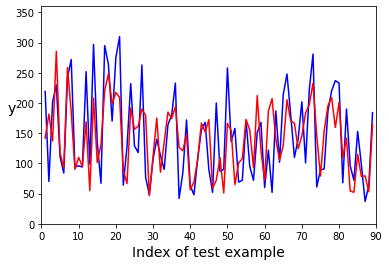


When looking at plot I would say that my linear regression model is making pretty good predictions. It mostly seems to undershoot the true labels but not badly.
The RNSE and MAE seem to tell the same story as well while they aren't close to 1, and I think while they are larger than desired, they fall within an acceptable range for the scale of our data and the size of the dataset.


In [67]:
indices = np.arange(1, 90)
plt.plot(indices, y_test, "b-")
plt.plot(indices, y_predict, "r-")
plt.xlabel("Index of test example", fontsize=14)
plt.ylabel("y", fontsize=14, rotation=0)
plt.axis([0, 90, 0, 360])
plt.show()

print("\nWhen looking at plot I would say that my linear regression model is making pretty good predictions. It mostly seems to undershoot the true labels but not badly.")
print("The RNSE and MAE seem to tell the same story as well while they aren't close to 1, and I think while they are larger than desired, they fall within an acceptable range for the scale of our data and the size of the dataset.")